**Name** - Aayush Singh
**Course** - Data Science

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [32]:
df = pd.read_csv('IMDbMoviesIndia.csv', encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [35]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [36]:
#to check if there are any null values or not in data
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [37]:
#changing rows from Rating column having NaN values since it has more NAN values
#than half of the total rows and also it is important so not dropping the whole
#column
df.dropna(subset=["Rating"], inplace = True)

In [38]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [39]:
#changing rows from Genre, Director, Actor 1, Actor 2 and Actor 3 column having
#NaN values since it is important so not dropping the whole column
df.dropna(subset=["Genre","Director","Actor 1","Actor 2","Actor 3"], inplace = True)

In [40]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [41]:
df.describe()

,Rating
count,7558.000000
mean,5.811127
std,1.368255
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [42]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


Since Year is in (2019) we need to convert it into integer form. Also, removing "," from votes column between the numbers making it integer.

In [43]:
#removing ',' between the numbers
df['Votes'] = df['Votes'].str.replace(',','').astype(int)
#removing '()' from Year column
df['Year'] = df['Year'].str.strip('()').astype(int)

In [87]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


There is min mentioned in duration column after number of minutes.

In [44]:
#Removing min word from the Duration column and converting it from string to integer
df['Duration'] = df['Duration'].str.strip('min')

In [45]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

Duration column still have NaN values

In [46]:
#putting median value in place of NaN values in Duration Column
df['Duration'].fillna(df['Duration'].median(),inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,135.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [47]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

The data has become clean now.

Exploratory Data Analysis

We are finding the top 20 most rated movies from the list.

In [48]:
# find top 20 movies based on rating
top_m = df.loc[df['Rating'].sort_values(ascending=False)[:20].index]
top_m

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


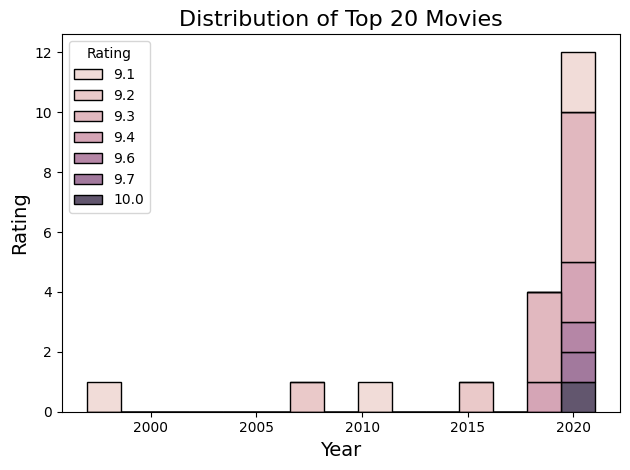

In [49]:
#graph of year and rating showing top 20 movies
sns.histplot(data=top_m, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 20 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

Showing Distribution of Top Directors by Average Rating

In [50]:
# Group the data by director and calculate the average rating
d_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()
d_avg_rating = d_avg_rating.sort_values(by='Rating', ascending=False)
top_d = d_avg_rating.head(10)
top_d

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


<ipython-input-51-cd2a3b68f068>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_d, x='Rating', y='Director', palette='viridis')


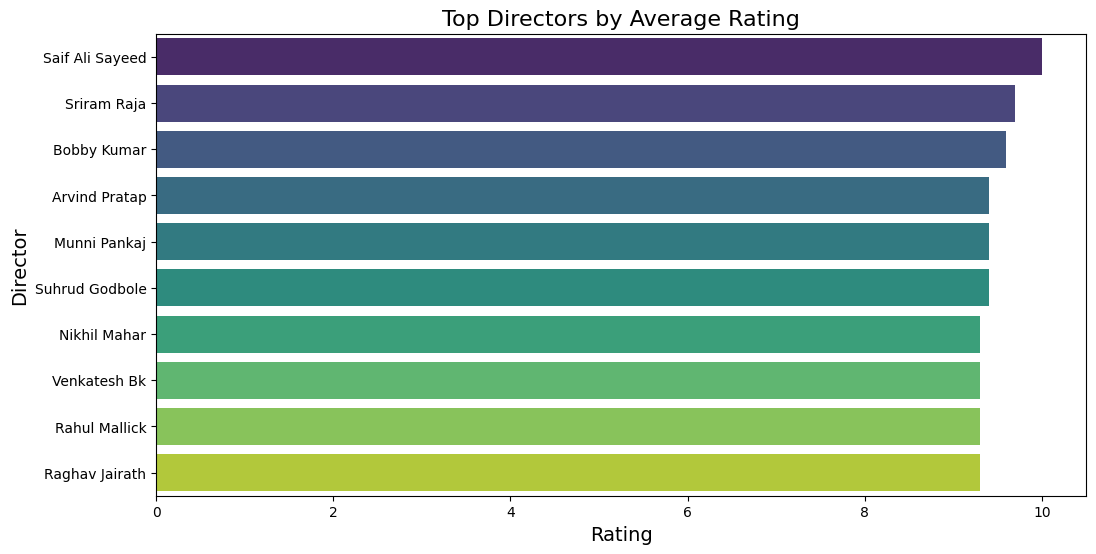

In [51]:
#barplot showing above table of top directors
plt.figure(figsize=(12, 6))
sns.barplot(data=top_d, x='Rating', y='Director', palette='viridis')
plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.show()

Movies distribution according to Genre

In [52]:
genre_c = df['Genre'].value_counts().reset_index()
genre_c.columns = ['Genre', 'Count']
genre_c

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
...,...,...
411,"Family, Drama, Thriller",1
412,"Action, Musical, War",1
413,"Action, Fantasy, Horror",1
414,"Horror, Crime, Thriller",1


In [53]:
#Taking top 10 genres
top_g = genre_c.head(10)
top_g

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
5,"Action, Drama",270
6,Comedy,251
7,"Comedy, Drama",237
8,Romance,226
9,"Comedy, Drama, Romance",213


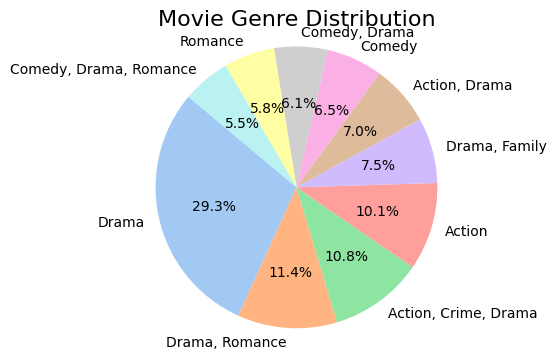

In [54]:
#piegraph showing above table of top 10 genres
plt.figure(figsize=(4, 4))
plt.pie(top_g['Count'], labels=top_g['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

Distribution of Top Actors according to the number of movies

In [55]:
actor_c = df['Actor 1'].value_counts().reset_index()
actor_c.columns = ['Actor', 'MovieCount']
actor_c

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
...,...,...
2410,Yuvraj Kumar,1
2411,Amrityan,1
2412,Manish Anand,1
2413,Nyra Banerjee,1


In [56]:
#taking top 10 actors
top_a = actor_c.head(10)
top_a

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


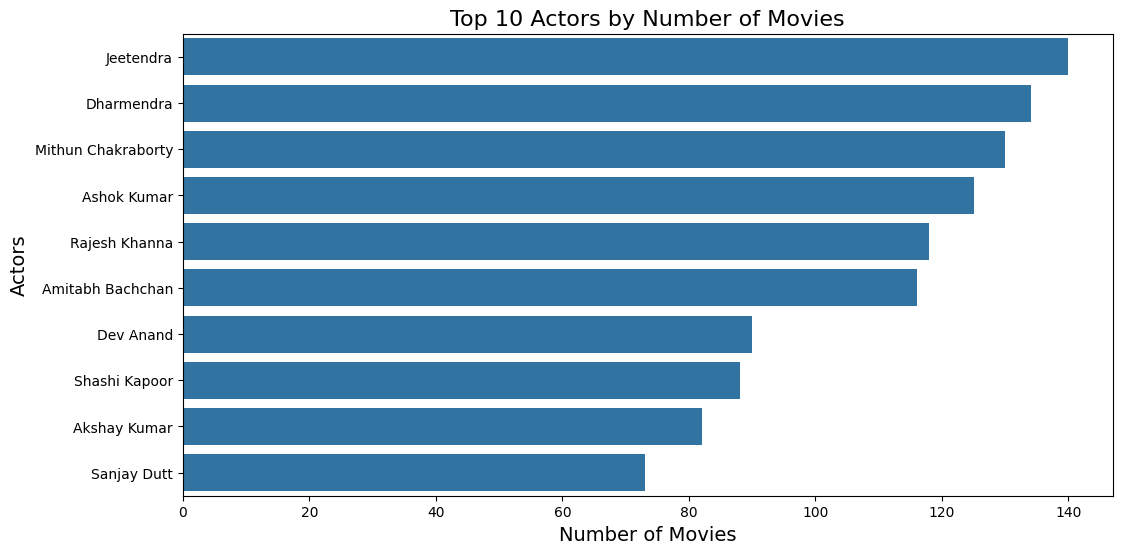

In [57]:
#barplot showing the above table of top 10 actors
plt.figure(figsize=(12, 6))
sns.barplot(data=top_a, x='MovieCount', y='Actor', orient='h')
plt.title('Top 10 Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actors', fontsize=14)
plt.show()

Distribution of Number of Movies released each year

In [58]:
yearly_c = df['Year'].value_counts().reset_index()
yearly_c.columns = ['Year', 'MovieCount']
yearly_c = yearly_c.sort_values(by='Year')
yearly_c

,Year,MovieCount
91,1917,1
88,1931,3
89,1932,2
86,1933,4
90,1934,2
...,...,...
1,2017,223
2,2018,214
0,2019,238
9,2020,157


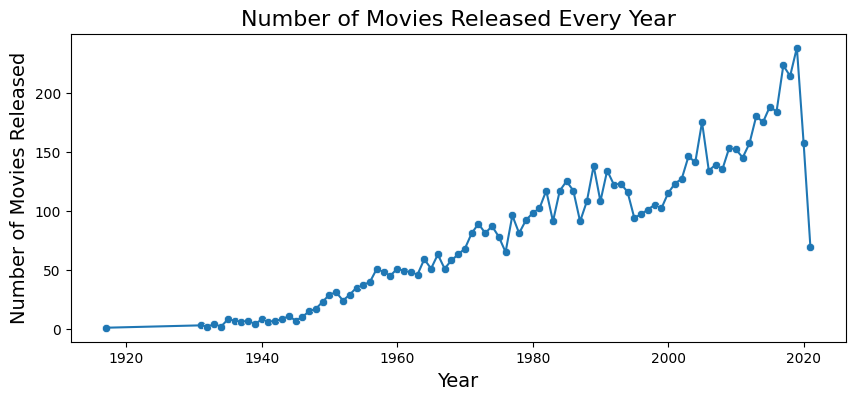

In [59]:
#scatter plot showing above table
plt.figure(figsize=(10, 4))
sns.scatterplot(data=yearly_c, x='Year', y='MovieCount')
sns.lineplot(data=yearly_c, x='Year', y='MovieCount')
plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.show()

Distribution of Movies with rating greater than 7 and votes greater than 8000

In [60]:
vot_rat=df[(df['Rating'] > 8) & (df['Votes'] > 8000)]
vot_rat

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


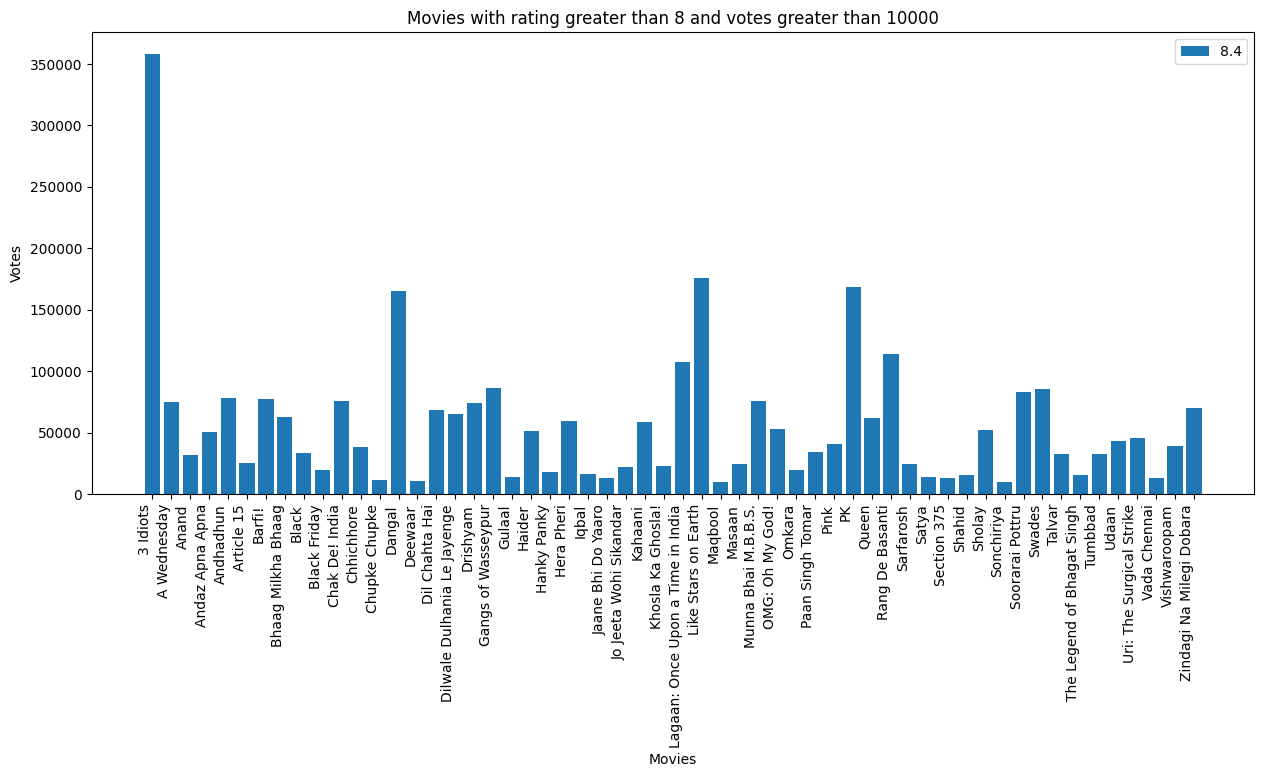

In [61]:
#barplot showing above table
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.bar(vot_rat['Name'], vot_rat['Votes'])
plt.xlabel('Movies')
plt.ylabel('Votes')
plt.title('Movies with rating greater than 8 and votes greater than 10000')
plt.xticks(rotation=90, ha='right')
plt.legend(vot_rat['Rating'], loc='upper right')
plt.show()

Distribution of Number of Movies each Genre

In [62]:
#since there are movies with more than 1 genre we separate them and display them in all the genres it has
df['Genre'] = df['Genre'].str.split(',')
genre_df = df.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


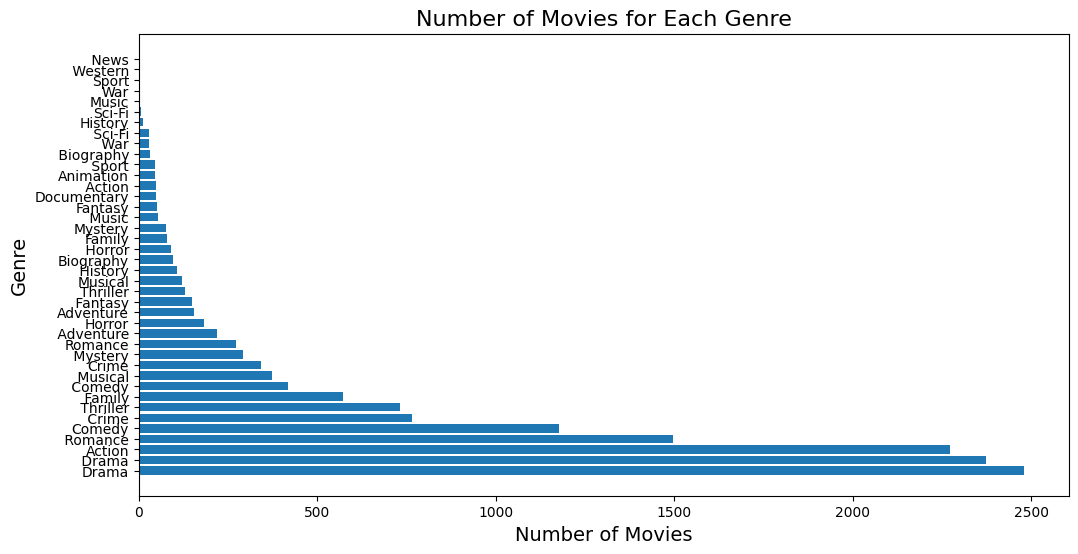

In [63]:
#bargraph showing above table
plt.figure(figsize=(12, 6))
genre_counts = genre_df['Genre'].value_counts()
plt.barh(range(len(genre_counts)), genre_counts.values, align='center')
plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.yticks(range(len(genre_counts)), genre_counts.index)
plt.show()

Featured Engineering

In [64]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
labelencoder = LabelEncoder()
df['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x))
df['Director'] = labelencoder.fit_transform(df['Director'])
df['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
df['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
df['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])
features = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes', 'Year', 'Duration']]
target = df['Rating']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

Data Modelling

Splitting the above data into test and train

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

Here I am using Random Forest Regression Model.
Note- You can use different ways other than 'Random Forest Regression Model' to create this model.

In [66]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Making Prediction on testing set

In [67]:
y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

Mean Squared Error: 1.2329954636243388
R-squared: 0.3345366026736696
      Actual  Predicted
6241     7.4      7.439
3321     4.9      6.130
6117     6.5      6.198
5975     5.7      6.262
6653     7.0      7.118
